In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
search_logs_df=pd.read_pickle('data_for_torob/search_logs.pkl')
categories_df=pd.read_pickle('data_for_torob/categories.pkl')
products_df=pd.read_pickle('data_for_torob/products.pkl')
search_click_logs_df=pd.read_pickle('data_for_torob/search_click_logs.pkl')

In [163]:
search_logs_df.head()

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU


In [164]:
categories_df.head()

,title,id,parent_category_id
0,گوشی موبایل,2580,175.0
1,تبلت,9458,175.0
2,هدفون، هدست و هندزفری,1092,175.0
3,لوازم جانبی موبایل و تبلت,8192,175.0
4,قطعات موبایل و تبلت,3596,175.0


In [165]:
products_df.head()

,id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320


In [166]:
search_click_logs_df.head()

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5


### 🚩Validate uniquness of ID columns

For example, we can confirm whether all the unique ID columns (i.e. `id` column) have no duplicate values for all the dataframes we have. Let's check this for all the four dataframes:

In [167]:
search_click_logs_df['id']=search_click_logs_df['id'].drop_duplicates(keep='first')

In [168]:
products_df['id']=products_df['id'].drop_duplicates(keep='first')

In [169]:
categories_df['id']=categories_df['id'].drop_duplicates(keep='first')

In [170]:
search_logs_df['id']=search_logs_df['id'].drop_duplicates(keep='first')

### 🚩Validate all the search clicks have a valid rank value

Here, we would like to check two things about the rank of search click records: 1) they have no NaN value, 2) they are all between 0 and 9 (because searches have at most 10 results). Let's do these checks:

In [171]:
search_click_logs_df['rank'].isnull().sum()

0

In [172]:
search_click_logs_df['rank']

0         1
1         2
2         6
3         3
4         5
         ..
295687    4
295688    1
295689    8
295690    2
295691    1
Name: rank, Length: 295692, dtype: int64

In [173]:
p=[False if i>=10 & i<0 else True for i in search_click_logs_df['rank'] ]
if False in p:
    prtint(False)
else:
    print(True)

True


In [174]:
def cheack_rank(ranks):
    for rank in ranks:
        if rank>=10 & rank<0 :
            return False
        else:
            return True
   
d=cheack_rank(search_click_logs_df['rank'])

In [175]:
print(d)

True


## Exploratory Data Analysis (EDA)

Now that we have loaded the data, we are ready to start the processing and analysis of our data.

### 🚩Number of searches and search clicks

The most basic stat we can get from our data is the number of searches and search clicks we have. Let's find and print them:

In [176]:
len(search_logs_df['id'])

539289

In [177]:
len(search_click_logs_df['id'])

295692

### 🚩Number of unique search queries

We can also calculate the number of unique search queries.

In [157]:
search_counts_query=pd.value_counts(search_logs_df['raw_query'])
search_counts_query

iphone                 7626
دلار امریکا            3240
کفش                    3211
روغن                   2956
لپ تاپ ایسوس           1940
                       ... 
ویدیوپروژکتور epson       1
کله پلی تیبا عظام         1
ساندو                     1
Django                    1
دراپ بنر بی تی اس         1
Name: raw_query, Length: 260193, dtype: int64

In [159]:
search_counts_query[search_counts_query==1].index

Index(['گاستروبکچ', 'اپل واچ گرین', 'تسمه کولرپراید صبا', 'مایکروویو میگل',
       'پستونک طلایی', 'lp e6n battery', 'ویترین چوبی', 'note 20 5G',
       'آرد گنبد', '2814l',
       ...
       'لاستیک  205', 'نخ ویکریل2/0 راند', 'اسپرسو telionix',
       'اسیدشویی گرمسار', 'ویبره برقی سنباد', 'ویدیوپروژکتور epson',
       'کله پلی تیبا عظام', 'ساندو', 'Django', 'دراپ بنر بی تی اس'],
      dtype='object', length=212030)

In [178]:
search_logs_df['raw_query'].unique()

array(['سرویس ملامین نشکن', 'جارو برقی', ' دسته ps4 ', ...,
       'دستگاه همزن اب زرشک', 'گیره تزیینی مو', 'دراپ بنر بی تی اس'],
      dtype=object)

### 🚩Number of unique users

Another basic stat is the number of unique users who searched on Torob. We can use `user_id` column to calculate this:

In [19]:
count_user_id=pd.value_counts(search_logs_df['user_id'])
count_user_id

NDQAS    407
IUFBI    138
PIIYT     94
XQTZS     93
EMDSX     92
        ... 
TPMTL      1
MRHPH      1
JTDEU      1
BUPQW      1
MVVMZ      1
Name: user_id, Length: 311083, dtype: int64

In [160]:
count_user_id[count_user_id==1].index

Index(['CYVMQ', 'YMOCQ', 'FGDLF', 'BDVZU', 'EQZTB', 'WVCHP', 'YOOQF', 'APNPC',
       'JVJAA', 'UIKPJ',
       ...
       'UNVNS', 'DPUJA', 'PWJWL', 'GHMTN', 'MMBJJ', 'TPMTL', 'MRHPH', 'JTDEU',
       'BUPQW', 'MVVMZ'],
      dtype='object', length=205708)

In [179]:
search_logs_df['user_id'].unique()

array(['MPOHZ', 'NZPJN', 'NRMQA', ..., 'JVLCM', 'HTSOL', 'MVVMZ'],
      dtype=object)

### 🚩Most frequent search queries

We would like to know which search queries are the most popular (i.e. most frequent). We can use the "search logs" data to find the answer. Find the top 20 most searched queries along with their number of searches:

In [20]:
pd.value_counts(search_logs_df.raw_query).head(20)

iphone           7626
دلار امریکا      3240
کفش              3211
روغن             2956
لپ تاپ ایسوس     1940
دوربین عکاسی     1929
شیر              1781
دوچرخه 26        1689
xbox series s    1617
لباس عروس        1577
گوشی             1454
روغن موتور       1333
ماکروویو         1196
xiaomi 12 pro    1083
کاغذ a4          1012
تلویزیون          843
گوشی سامسونگ      812
دوچرخه            807
یخچال             789
روغن خوراکی       787
Name: raw_query, dtype: int64

### 🚩Distribution of length of search queries

We expect that the majority of search queries consist of at most three words. Let's confirm our expectation by calculating the number of words in each search query and then aggregate these values to see how the length of queries is distributed (i.e. find the distribution of number of words in search queries):

In [21]:
search_logs_df.raw_query

0         سرویس ملامین نشکن
1                 جارو برقی
2                 دسته ps4 
3              کلو تریمازول
4             قرص فولی کوژن
                ...        
539284       گیره تزیینی مو
539285    دراپ بنر بی تی اس
539286      مینی فرز رونیکس
539287                 t295
539288         سرویس قابلمه
Name: raw_query, Length: 539289, dtype: object

In [22]:
def length_of_search(sentence):
    sen=sentence.split(' ')
  
    return len(sen)

In [23]:
array_of_length=search_logs_df.raw_query.apply(lambda x: length_of_search(x))
array_of_length

0         3
1         2
2         4
3         2
4         3
         ..
539284    3
539285    5
539286    3
539287    1
539288    2
Name: raw_query, Length: 539289, dtype: int64

In [180]:
count_of_search=array_of_length.value_counts()
count_of_search

2     205515
3     146307
1     133004
4      46853
5       6926
6        627
7         48
8          5
9          3
12         1
Name: raw_query, dtype: int64

<BarContainer object of 10 artists>

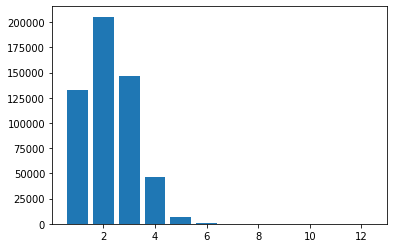

In [26]:
plt.bar(count_of_search.index,count_of_search.values)

### 🚩Most common words in search queries ??

Which words were most commonly used in the search queries? Find the top 20 most common words along with their number of occurrences in search queries:

In [27]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU
...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF


In [28]:
def sepraite_words(words):
    return words.split(' ')

In [29]:
query_word=search_logs_df.raw_query.apply(lambda x : sepraite_words(x))

In [30]:
search_logs_df['query_word']=query_word

In [31]:
df_query_word=search_logs_df.explode(['query_word'])
df_query_word

,id,raw_query,result,datetime,category_id,user_id,query_word
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,سرویس
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,ملامین
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,نشکن
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN,جارو
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN,برقی
...,...,...,...,...,...,...,...
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE,فرز
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE,رونیکس
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF,t295
539288,afnwn,سرویس قابلمه,"[7674912, 3037094, 3876156, 8439562, 746455, 4...",2022-05-17 10:59:08.572000+00:00,NaN,MVVMZ,سرویس


In [32]:
pd.value_counts(df_query_word.query_word)

               29216
گوشی           12606
روغن           11010
iphone          9228
موتور           8039
               ...  
آمکسیلین           1
K571LH             1
سانسول             1
شامپومکس           1
دستبندسیلیو        1
Name: query_word, Length: 89441, dtype: int64

### 🚩Localize date and time values

Currently, the date & time values in the search and search-click dataframes are stored in UTC timezone. This is a best-pratice to store timestamp values in UTC when the data is stored in databases; however, for our next time-based analyses to be more understandable, we need to convert them all to Tehran timezone.

Convert and replace the `datetime` columns in both search and search-click dataframes:

In [33]:
search_logs_df.datetime

0        2022-05-16 13:17:22.701000+00:00
1        2022-05-18 11:24:02.385000+00:00
2        2022-05-14 19:35:31.691000+00:00
3        2022-05-14 18:20:55.328000+00:00
4        2022-05-13 19:50:03.519000+00:00
                       ...               
539284   2022-05-17 11:40:45.256000+00:00
539285   2022-05-16 17:22:19.306000+00:00
539286   2022-05-18 11:55:34.127000+00:00
539287   2022-05-14 10:50:27.468000+00:00
539288   2022-05-17 10:59:08.572000+00:00
Name: datetime, Length: 539289, dtype: datetime64[ns, UTC]

In [34]:
def change_time(time):
    return time.tz_convert(tz = 'Asia/Tehran')

In [35]:
search_logs_df.datetime.apply(lambda x : change_time(x))

0        2022-05-16 17:47:22.701000+04:30
1        2022-05-18 15:54:02.385000+04:30
2        2022-05-15 00:05:31.691000+04:30
3        2022-05-14 22:50:55.328000+04:30
4        2022-05-14 00:20:03.519000+04:30
                       ...               
539284   2022-05-17 16:10:45.256000+04:30
539285   2022-05-16 21:52:19.306000+04:30
539286   2022-05-18 16:25:34.127000+04:30
539287   2022-05-14 15:20:27.468000+04:30
539288   2022-05-17 15:29:08.572000+04:30
Name: datetime, Length: 539289, dtype: datetime64[ns, Asia/Tehran]

In [36]:
def change_time_one(time):
    return time.tz_convert(tz = 'Asia/Tehran')

In [37]:
search_click_logs_df.datetime.apply(lambda x: change_time_one(x))

0        2022-05-14 00:00:14.030000+04:30
1        2022-05-14 00:00:24.290000+04:30
2        2022-05-14 00:00:24.394000+04:30
3        2022-05-14 00:00:30.500000+04:30
4        2022-05-14 00:00:32.884000+04:30
                       ...               
295687   2022-05-20 23:59:54.307000+04:30
295688   2022-05-20 23:59:56.579000+04:30
295689   2022-05-20 23:59:56.804000+04:30
295690   2022-05-20 23:59:57.718000+04:30
295691   2022-05-20 23:59:58.992000+04:30
Name: datetime, Length: 295692, dtype: datetime64[ns, Asia/Tehran]

### 🚩Number of searches and search-clicks per weekday

Now that we have converted the datetime to Tehran timezone, we are interested to know how many searches and search-clicks exist per weekday (i.e. Saturday, Sunday, Monday, etc.). We expect that both of these numbers to be a bit lower on weekends (i.e. Thursday and Friday).

Calculate the number of searches and search-clicks per weekday and plot both alongside each other in a single bar plot:

**Write the answer below:**  
(Hint: again, you can use the methods which exist via `dt` accessor to get the weekday of datetime values. As a challenge, try to write all the calculations and plotting in just a single python statement by using method chaining... a lot!)

In [38]:
def day_name(day):
    return day.day_name()

In [39]:
search_logs_daysofweek=search_logs_df.datetime.apply(lambda x: day_name(x))
search_logs_daysofweek

0            Monday
1         Wednesday
2          Saturday
3          Saturday
4            Friday
            ...    
539284      Tuesday
539285       Monday
539286    Wednesday
539287     Saturday
539288      Tuesday
Name: datetime, Length: 539289, dtype: object

In [40]:
search_logs=search_logs_daysofweek.value_counts()

<BarContainer object of 7 artists>

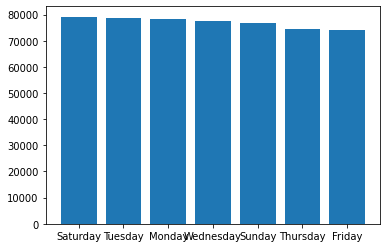

In [41]:
plt.bar(search_logs.index,search_logs.values)

In [42]:
search_click_logs_daysofweek=search_click_logs_df.datetime.apply(lambda x: day_name(x))

In [43]:
search_click=search_click_logs_daysofweek.value_counts()

<BarContainer object of 7 artists>

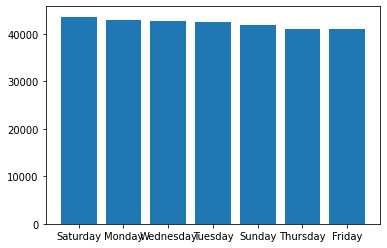

In [44]:
plt.bar(search_click.index,search_click.values)

In [45]:
pd.unique(search_click_logs_daysofweek)

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

### with one bar

<AxesSubplot:xlabel='day_click'>

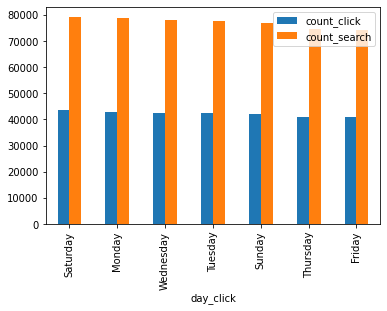

In [46]:
df22 = pd.DataFrame(
   dict(
      day_click=search_click.index,
      count_click=search_click.values,
       count_search=search_logs.values
   )
)

df22.plot(x='day_click',y=['count_click','count_search'],kind='bar')

### 🚩Number of searches and search-clicks per hour of day

Next, we would like to know which hour during the day has the most search traffic.

Calculate the number of searches and search-clicks per hour and plot both alongside each other in a single bar plot (note that we are just interested in the hour regardless of the specific day; so the result should be aggregated based on hour **over all the days**):

**Write the answer below:**  
(Hint: again, `dt` accessor is your friend here as well!)

In [47]:
def per_hours(day):
    return day.hour

In [48]:
search_logs_hourofday=search_logs_df.datetime.apply(lambda x: per_hours(x))

In [49]:
pd.unique(search_logs_hourofday)

array([13, 11, 19, 18,  6, 14,  7, 15, 21, 20,  5, 16,  4,  3,  9, 23,  8,
       12,  1, 10, 17,  0, 22,  2], dtype=int64)

In [50]:
search_logs_hour=search_logs_hourofday.value_counts()
search_logs_hour

18    34672
19    33028
17    32993
9     31346
16    31317
10    31020
8     30630
11    29698
15    29094
7     28470
12    28460
14    28400
13    28292
20    26664
6     24920
5     19424
21    17657
4     13934
22    10445
3      8967
23     6201
2      5388
0      4281
1      3988
Name: datetime, dtype: int64

<BarContainer object of 24 artists>

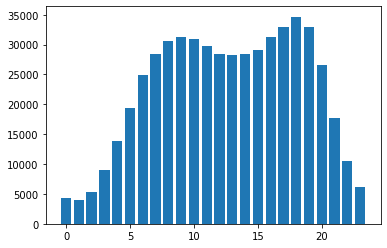

In [51]:
plt.bar(search_logs_hour.index,search_logs_hour.values)

In [52]:
search_click_logs_hourofdays=search_click_logs_df.datetime.apply(lambda x: per_hours(x))


In [53]:
search_click_logs_hour=search_click_logs_hourofdays.value_counts()
search_click_logs_hour

18    19950
17    18771
19    18664
16    17746
9     17368
10    16978
15    16425
8     16416
11    16240
14    15892
12    15511
13    15342
7     15189
20    14834
6     13001
5     10004
21     9907
4      7078
22     5627
3      4503
23     3279
2      2775
0      2199
1      1993
Name: datetime, dtype: int64

<BarContainer object of 24 artists>

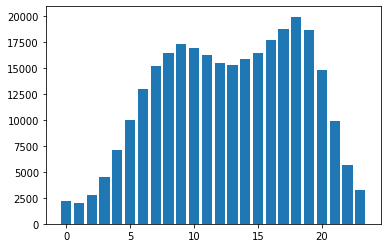

In [54]:
plt.bar(search_click_logs_hour.index,search_click_logs_hour.values)

### 🚩Top 10 most frequent search queries per weekday

Now, instead of calculating the most frequent queries over all the timeframe of the data, we would like to find the top 10 most frequent queries per weekday (note that we don't need the number of searches for each query; we are just interested in the queries themeselves).

In [55]:
search_logs_df['days_of_week']=search_logs_daysofweek

In [56]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id,query_word,days_of_week
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,"[سرویس, ملامین, نشکن]",Monday
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN,"[جارو, برقی]",Wednesday
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA,"[, دسته, ps4, ]",Saturday
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT,"[کلو, تریمازول]",Saturday
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU,"[قرص, فولی, کوژن]",Friday
...,...,...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD,"[گیره, تزیینی, مو]",Tuesday
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP,"[دراپ, بنر, بی, تی, اس]",Monday
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE,"[مینی, فرز, رونیکس]",Wednesday
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF,[t295],Saturday


In [57]:
search_logs_df[search_logs_df['days_of_week']=='Monday'].raw_query.value_counts().head(10)

iphone           1092
دوچرخه 26         482
روغن              462
کفش               439
روغن موتور        327
لپ تاپ ایسوس      320
دوربین عکاسی      284
شیر               262
xbox series s     251
گوشی              197
Name: raw_query, dtype: int64

In [58]:
search_logs_df[search_logs_df['days_of_week']=='Sunday'].raw_query.value_counts().head(10)

iphone           1019
روغن خوراکی       595
دوچرخه 26         569
روغن              497
کفش               467
روغن موتور        359
لپ تاپ ایسوس      311
دوربین عکاسی      271
xbox series s     254
گوشی              215
Name: raw_query, dtype: int64

In [59]:
search_logs_df[search_logs_df['days_of_week']=='Wednesday'].raw_query.value_counts().head(10)

iphone           1087
دلار امریکا       785
کفش               430
شیر               372
لباس عروس         370
روغن              284
xiaomi 12 pro     264
لپ تاپ ایسوس      259
کاغذ a4           242
دوربین عکاسی      238
Name: raw_query, dtype: int64

In [60]:
search_logs_df[search_logs_df['days_of_week']=='Saturday'].raw_query.value_counts().head(10)

iphone           1227
روغن              769
کفش               488
دوچرخه 26         421
روغن موتور        421
دوربین عکاسی      349
لپ تاپ ایسوس      284
xbox series s     265
مبل               249
گوشی              208
Name: raw_query, dtype: int64

In [61]:
search_logs_df[search_logs_df['days_of_week']=='Tuesday'].raw_query.value_counts().head(10)

iphone           1076
دلار امریکا       919
کفش               491
لباس عروس         448
روغن              375
شیر               343
کاغذ a4           270
xiaomi 12 pro     264
لپ تاپ ایسوس      258
دوربین عکاسی      248
Name: raw_query, dtype: int64

In [62]:
search_logs_df[search_logs_df['days_of_week']=='Thursday'].raw_query.value_counts().head(10)

iphone           1036
دلار امریکا       761
کفش               420
لباس عروس         393
شیر               297
لپ تاپ ایسوس      271
روغن              263
دوربین عکاسی      233
xiaomi 12 pro     220
کاغذ a4           207
Name: raw_query, dtype: int64

In [63]:
search_logs_df[search_logs_df['days_of_week']=='Friday'].raw_query.value_counts().head(10)

iphone           1089
دلار امریکا       643
کفش               476
دوربین عکاسی      306
روغن              306
لباس عروس         294
شیر               259
لپ تاپ ایسوس      237
xbox series s     235
xiaomi 12 pro     222
Name: raw_query, dtype: int64

### 🚩Number of searches per user

Next, we would like to know how many of the searches are done by our regular visitors or loyal users.

Calculate the number of searches per user such that we could know the number of users with at most 3 searches, between 4 and 9 searches, and at least 10 searches.

In [64]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id,query_word,days_of_week
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,"[سرویس, ملامین, نشکن]",Monday
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN,"[جارو, برقی]",Wednesday
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA,"[, دسته, ps4, ]",Saturday
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT,"[کلو, تریمازول]",Saturday
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU,"[قرص, فولی, کوژن]",Friday
...,...,...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD,"[گیره, تزیینی, مو]",Tuesday
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP,"[دراپ, بنر, بی, تی, اس]",Monday
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE,"[مینی, فرز, رونیکس]",Wednesday
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF,[t295],Saturday


In [65]:
pd.unique(search_logs_df.user_id)

array(['MPOHZ', 'NZPJN', 'NRMQA', ..., 'JVLCM', 'HTSOL', 'MVVMZ'],
      dtype=object)

In [66]:
number_of_search=search_logs_df.user_id.value_counts()
number_of_search

NDQAS    407
IUFBI    138
PIIYT     94
XQTZS     93
EMDSX     92
        ... 
TPMTL      1
MRHPH      1
JTDEU      1
BUPQW      1
MVVMZ      1
Name: user_id, Length: 311083, dtype: int64

In [67]:
number_of_search[number_of_search<=3].index

Index(['AISOU', 'RNPAD', 'TNMCT', 'QYSYX', 'RRILF', 'FNXHU', 'YHJXD', 'KIMTG',
       'ZFGYH', 'RQNMX',
       ...
       'UNVNS', 'DPUJA', 'PWJWL', 'GHMTN', 'MMBJJ', 'TPMTL', 'MRHPH', 'JTDEU',
       'BUPQW', 'MVVMZ'],
      dtype='object', length=286513)

In [68]:
number_of_search[(number_of_search<=9) & (number_of_search>=4)].index

Index(['VECIG', 'GOGZY', 'DAXYG', 'XXWJL', 'IXMYC', 'KHQSI', 'NCPJB', 'BKMTQ',
       'ZJSHE', 'SFXZC',
       ...
       'QZUFH', 'USPUZ', 'CFWQT', 'FTWXZ', 'AKLVL', 'LLYWV', 'XMWZX', 'QHCSB',
       'XDAKK', 'CMRCH'],
      dtype='object', length=22223)

In [69]:
number_of_search[number_of_search>=10].index

Index(['NDQAS', 'IUFBI', 'PIIYT', 'XQTZS', 'EMDSX', 'QRRKN', 'WTQXG', 'IZTBU',
       'SVOEZ', 'JVMLL',
       ...
       'GHUUK', 'NYVGJ', 'WUEYQ', 'IKZJX', 'UMBBE', 'ZFNEZ', 'FZDTT', 'AXJOY',
       'YRIHW', 'VZQAJ'],
      dtype='object', length=2347)

### 🚩Number of searches with or without a category

For some of the searches, a product category is also selected by the user which limits the search results to only the products in the selected category. We would like to find the number of these searches and compare it against searches without category.

Calculate the number of searches with and without a selected category by users:

**Write the answer below:**  
(Hint: if `category_id` is `NaN` for a search record, it means that search was performed without selecting a category; and consider that Pandas is very NA-friendly and also has methods for detecting `NaN` values.)

In [181]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU
...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF


In [182]:
search_with_category=search_logs_df['category_id'].dropna().count()
search_with_category

129240

In [183]:
search_without_category=search_logs_df['id'].count() - search_with_category
search_without_category

410049

### 🚩Most frequent search queries among searches with a category

This is the same as the earlier exercise for finding the most frequent search queries, but it only consider searches with a selected category by user.

Find the top 10 most frequent search queries among searches with a category, along with their number of searches:

In [82]:
# search_logs_df=search_logs_df['category_id'][~np.isnan(search_logs_df['category_id'])]
# search_logs_df

In [88]:
df_without_category=search_logs_df.dropna(subset=['category_id'])
df_without_category

,id,raw_query,result,datetime,category_id,user_id
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU
6,usnzj,مرغک ثابت تراشکاری,[],2022-05-17 19:28:59.681000+00:00,3830.0,YVJVL
12,zqorv,X45 u,"[1055511, 3738080, 7429678, 665867, 9318842, 4...",2022-05-20 11:07:18.716000+00:00,4746.0,QHSJV
19,jznzw,لوازم ارایشگاه,"[8168710, 7938527, 631200, 4793829, 9782980, 7...",2022-05-20 05:23:40.560000+00:00,6119.0,KGFRE
...,...,...,...,...,...,...
539270,qrysa,بینی,"[5820724, 1514614, 6695073, 2783611, 1235663, ...",2022-05-14 10:05:08.033000+00:00,876.0,WAUIT
539271,jigvf,همزن اینوکس,"[3223085, 2478803, 1201122, 2976099, 9264053, ...",2022-05-18 09:18:47.423000+00:00,5568.0,LCUNX
539272,zpkdi,اتو پرسی,"[7418865, 5568569, 5559685, 8205164, 9054809, ...",2022-05-18 14:48:30.092000+00:00,1946.0,HSJYV
539274,datsk,دستبندسیلیو,[],2022-05-17 09:18:39.203000+00:00,3147.0,OUSMO


In [89]:
df_without_category['raw_query'].value_counts().head(10)

روغن        1854
گوشی         870
تلویزیون     520
یخچال        465
موتور        364
دوچرخه       325
کولر         317
ps5          291
شیایومی      280
هارد         280
Name: raw_query, dtype: int64

### 🚩Distribution of search clicks over different ranks

Is it more likely that the users click on the top search results instead of the lower ranked results? To find out, we need to compute the distribution of search-clicks over different ranks (i.e. number of search-clicks per rank of the clicked product in the search result).

Plot the distribution of number of search-clicks over different ranks using a bar plot:

In [90]:
search_click_logs_df

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5
...,...,...,...,...
295687,ekdor,2022-05-20 19:29:54.307000+00:00,yacmw,4
295688,rxpwg,2022-05-20 19:29:56.579000+00:00,keqas,1
295689,newqm,2022-05-20 19:29:56.804000+00:00,vpksd,8
295690,ksvlv,2022-05-20 19:29:57.718000+00:00,prptj,2


In [91]:
search_click_logs_df['rank'].unique()

array([1, 2, 6, 3, 5, 8, 7, 0, 4, 9], dtype=int64)

In [92]:
new_search_click_based_rank=search_click_logs_df.groupby(by=['rank']).count()
new_search_click_based_rank

,id,datetime,search_id
rank,,,
0,83334,83334,83334
1,55128,55128,55128
2,33671,33671,33671
3,29914,29914,29914
4,20575,20575,20575
5,18806,18806,18806
6,15189,15189,15189
7,14744,14744,14744
8,12222,12222,12222


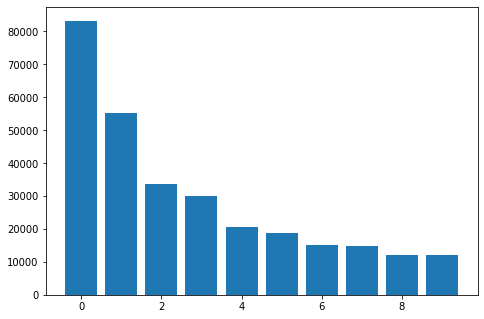

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(new_search_click_based_rank.index,new_search_click_based_rank.search_id);

### 🚩Number of searches per number of search results

How many of the searches have zero search result? How many of them have only 1 or 2 results? To find out, we can compute the distribution of number of searches per number of search-results.

Calculate the full distribution of number of searches per number of search results:

In [94]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU
...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF


In [95]:
def number_result(x):
    return len(x)

In [96]:
number_of_searches_per_number_of_search_results=search_logs_df.result.apply(lambda x: number_result(x))

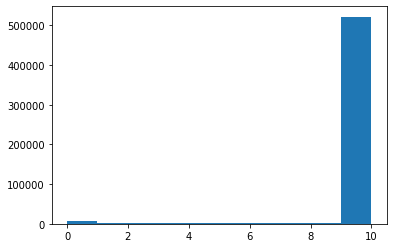

In [97]:
plt.hist(number_of_searches_per_number_of_search_results);

In [98]:
number_of_searches_per_number_of_search_results.value_counts()

10    521397
0       7938
1       2142
2       1606
3       1245
4       1025
6        868
5        855
8        791
7        763
9        659
Name: result, dtype: int64

### 🚩Most searched categories

Find the categories with the most of number of searches. We would like to know the ID of the categories as well as their **title**.

**Write the answer below:**  
(Hint: we can calculate the ID of most searched categories from "search logs" dataframe, but to find their title we should also use the "categories" dataframe; hence you probably need to perform a "join"/"merge" operation to combine the information from two dataframes.)

In [99]:
categories_df

,title,id,parent_category_id
0,گوشی موبایل,2580,175.0
1,تبلت,9458,175.0
2,هدفون، هدست و هندزفری,1092,175.0
3,لوازم جانبی موبایل و تبلت,8192,175.0
4,قطعات موبایل و تبلت,3596,175.0
...,...,...,...
3132,لوازم سفر و گردشگری,7540,NaN
3133,ارز و طلا,8254,NaN
3134,تجهیزات نگهداری و پرورش حیوانات,6855,NaN
3135,متفرقه,9352,NaN


In [100]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU
...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF


In [101]:
categorise_search_mergied=search_logs_df.merge(categories_df,left_on='category_id',right_on='id',suffixes=('_search', '_category'),how='inner').drop(columns=['raw_query','result','datetime','user_id'])
categorise_search_mergied

,id_search,category_id,title,id_category,parent_category_id
0,rxcka,4792.0,لوازم خانگی,4792,NaN
1,epqqo,4792.0,لوازم خانگی,4792,NaN
2,byngq,4792.0,لوازم خانگی,4792,NaN
3,ghnwg,4792.0,لوازم خانگی,4792,NaN
4,xvbos,4792.0,لوازم خانگی,4792,NaN
...,...,...,...,...,...
129235,uouzc,582.0,شومینه,582,216.0
129236,hfohf,4090.0,لباس کاراته و تکواندو,4090,3322.0
129237,yglzl,4771.0,شیلنگ رادیاتور خودرو,4771,3150.0
129238,ztrzm,4771.0,شیلنگ رادیاتور خودرو,4771,3150.0


In [184]:
categorise_search_mergied.groupby(by=['title'])['id_search'].count().sort_values(ascending=False).head(10)

title
گوشی موبایل              14960
روغن خوراکی               2647
لپ تاپ و نوت بوک          2170
هدفون، هدست و هندزفری     2110
کارت گرافیک               2089
تلویزیون                  1699
کیف و کاور گوشی           1223
لوازم تزئینی خودرو        1042
کولر گازی                  926
موتور سیکلت                884
Name: id_search, dtype: int64

### 🚩Number of clicks per searches

We would like to know how many of the searches have gotten no clicks, or how many of them have gotten more than one clicks. To find out, we should compute the distribution of number of clicks per searches:

**Write the answer below:**  
(Hint: the search data and search-click data are in two different dataframes. So again we may need to perform a join/merge operation).

In [103]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU
...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF


In [104]:
search_click_logs_df

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5
...,...,...,...,...
295687,ekdor,2022-05-20 19:29:54.307000+00:00,yacmw,4
295688,rxpwg,2022-05-20 19:29:56.579000+00:00,keqas,1
295689,newqm,2022-05-20 19:29:56.804000+00:00,vpksd,8
295690,ksvlv,2022-05-20 19:29:57.718000+00:00,prptj,2


In [105]:
search_with_search_click=search_click_logs_df.merge(search_logs_df,how='outer',left_on='search_id',right_on='id',suffixes=('_click_logs', '_search_logs'))
search_with_search_click

,id_click_logs,datetime_click_logs,search_id,rank,id_search_logs,raw_query,result,datetime_search_logs,category_id,user_id
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1.0,iitnm,مانیتور206,"[8363804, 4965044, 8352519, 4171803, 2797132, ...",2022-05-13 19:30:04.939000+00:00,NaN,LSAEM
1,bwpue,2022-05-13 19:33:40.433000+00:00,iitnm,6.0,iitnm,مانیتور206,"[8363804, 4965044, 8352519, 4171803, 2797132, ...",2022-05-13 19:30:04.939000+00:00,NaN,LSAEM
2,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2.0,scjlb,گوشی,"[3977234, 7631437, 5595460, 636414, 1196615, 9...",2022-05-13 19:30:04.298000+00:00,NaN,QYRLP
3,xwnlx,2022-05-13 19:30:50.508000+00:00,scjlb,2.0,scjlb,گوشی,"[3977234, 7631437, 5595460, 636414, 1196615, 9...",2022-05-13 19:30:04.298000+00:00,NaN,QYRLP
4,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6.0,ohuqq,قلم گاو,"[7856943, 3204265, 3175195, 4292810, 4341195, ...",2022-05-13 19:30:09.618000+00:00,4136.0,RTNTS
...,...,...,...,...,...,...,...,...,...,...
651959,NaN,NaT,NaN,NaN,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
651960,NaN,NaT,NaN,NaN,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
651961,NaN,NaT,NaN,NaN,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
651962,NaN,NaT,NaN,NaN,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF


In [188]:
l=search_with_search_click['id_click_logs'].isnull().sum()
l

356272

In [186]:
clicked=search_with_search_click['id_click_logs']
len(clicked)

651964

In [108]:
for i in clicked.values:
    if i != 1:
        print(i)

In [189]:
len(clicked)-l

295692

### 🚩Most clicked products

We are interested to know which product are the most popular. For that, we can count the clicks of each product and consider the most clicked products as the most popular ones. So let's find the top 20 most clicked products (we would like to know the ID, title and number of clicks for those products):

**Write the answer below:**  
(Hint: here we also need to combine information from multiple dataframes; to find the ID of clicked products, we need to consider both of "search logs" and "search clicks" dataframes, and for finding product info we additionally need the "products" dataframe.)

In [109]:
products_df

,id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320
...,...,...,...
108041,1985506,اسلایم سارا در انواع طرح و نوع متنوع با کیفیت ...,4062
108042,5278787,پک تخصصی کُرگیری(2دستگاه،5مته و 48سگمنت),3830
108043,8977011,پیراهن مردانه Dior مدل 28793,4107
108044,2157337,پیراهن مردانه Dior مدل 28794,4107


In [110]:
search_click_logs_df

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5
...,...,...,...,...
295687,ekdor,2022-05-20 19:29:54.307000+00:00,yacmw,4
295688,rxpwg,2022-05-20 19:29:56.579000+00:00,keqas,1
295689,newqm,2022-05-20 19:29:56.804000+00:00,vpksd,8
295690,ksvlv,2022-05-20 19:29:57.718000+00:00,prptj,2


In [111]:
new_search_click=search_click_logs_df.drop(['datetime'],axis=1)
new_search_click

,id,search_id,rank
0,jstyz,iitnm,1
1,ewusk,scjlb,2
2,osnio,ohuqq,6
3,expgi,pzrcn,3
4,srgdy,mhlmr,5
...,...,...,...
295687,ekdor,yacmw,4
295688,rxpwg,keqas,1
295689,newqm,vpksd,8
295690,ksvlv,prptj,2


In [112]:
search_logs_df

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU
...,...,...,...,...,...,...
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF


In [113]:
merged_search_click=search_logs_df.merge(new_search_click,left_on='id',right_on='search_id',suffixes=('_search_log','_click_log'))
merged_search_click

,id_search_log,raw_query,result,datetime,category_id,user_id,id_click_log,search_id,rank
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,wsssz,qahft,6
1,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU,bbnrq,usiey,7
2,gchqj,2 Basic,"[6080642, 5671981, 3808528, 8813110, 4304252, ...",2022-05-20 15:42:01.473000+00:00,NaN,FISZF,vydyh,gchqj,0
3,pesej,رسوب گیر مغناطیسی,"[4407515, 4538695, 1437575, 1960648, 3576832, ...",2022-05-13 21:20:03.763000+00:00,NaN,YNUWN,uebhj,pesej,1
4,ufaig,دوچرخه بچگانه,"[3065147, 5619615, 3242621, 8695133, 7256508, ...",2022-05-15 14:20:44.321000+00:00,NaN,WHSCF,xwfwy,ufaig,7
...,...,...,...,...,...,...,...,...,...
295687,jigvf,همزن اینوکس,"[3223085, 2478803, 1201122, 2976099, 9264053, ...",2022-05-18 09:18:47.423000+00:00,5568.0,LCUNX,aaasl,jigvf,4
295688,zpicq,روکش داخل کابینتی,"[9264831, 5428609, 1855117, 6995672, 9347079, ...",2022-05-20 13:20:41.811000+00:00,NaN,JVLCM,jmdvm,zpicq,5
295689,fbkkw,zbook i7 g3,"[4058675, 7220977, 4129017, 9125380, 2647004, ...",2022-05-15 20:44:36.814000+00:00,NaN,XVVAF,pseou,fbkkw,1
295690,fbkkw,zbook i7 g3,"[4058675, 7220977, 4129017, 9125380, 2647004, ...",2022-05-15 20:44:36.814000+00:00,NaN,XVVAF,cuaup,fbkkw,3


In [114]:
arr=[]
for i in merged_search_click.index:
    arr.append(merged_search_click['result'][i][merged_search_click['rank'][i]])

In [115]:
arr

[7542576,
 1627397,
 6080642,
 4538695,
 6447062,
 8029929,
 2297615,
 4793829,
 5572778,
 4546054,
 8781319,
 6459662,
 8783002,
 28595,
 9019349,
 3274170,
 203497,
 1532491,
 7961548,
 2101046,
 3602678,
 1949763,
 4095136,
 253379,
 253379,
 6233678,
 9377571,
 5446680,
 8027507,
 8027507,
 6840315,
 1699307,
 3676610,
 2627767,
 3422961,
 3422961,
 5913645,
 3336606,
 5101791,
 8467983,
 6453667,
 3727824,
 8971602,
 7828189,
 8394539,
 4654484,
 5492542,
 7678914,
 3398294,
 5670916,
 7687069,
 1743137,
 2094723,
 5683508,
 253379,
 253379,
 5269181,
 5269181,
 5269181,
 5269181,
 3682916,
 9193664,
 2478264,
 3464640,
 584347,
 1413914,
 2930485,
 7872623,
 9802224,
 7689284,
 7689284,
 949563,
 6316985,
 3057859,
 2618360,
 8058180,
 1027264,
 8180239,
 4608500,
 8180239,
 3387187,
 5516929,
 5516929,
 7792022,
 7792022,
 8133111,
 8133111,
 5620339,
 3638946,
 7061128,
 7061128,
 7061128,
 7061128,
 7751086,
 9003005,
 9184035,
 7845201,
 550072,
 550072,
 3031286,
 2002538,
 

In [116]:
merged_search_click['result_id']=arr

In [117]:
merged_search_click

,id_search_log,raw_query,result,datetime,category_id,user_id,id_click_log,search_id,rank,result_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,wsssz,qahft,6,7542576
1,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU,bbnrq,usiey,7,1627397
2,gchqj,2 Basic,"[6080642, 5671981, 3808528, 8813110, 4304252, ...",2022-05-20 15:42:01.473000+00:00,NaN,FISZF,vydyh,gchqj,0,6080642
3,pesej,رسوب گیر مغناطیسی,"[4407515, 4538695, 1437575, 1960648, 3576832, ...",2022-05-13 21:20:03.763000+00:00,NaN,YNUWN,uebhj,pesej,1,4538695
4,ufaig,دوچرخه بچگانه,"[3065147, 5619615, 3242621, 8695133, 7256508, ...",2022-05-15 14:20:44.321000+00:00,NaN,WHSCF,xwfwy,ufaig,7,6447062
...,...,...,...,...,...,...,...,...,...,...
295687,jigvf,همزن اینوکس,"[3223085, 2478803, 1201122, 2976099, 9264053, ...",2022-05-18 09:18:47.423000+00:00,5568.0,LCUNX,aaasl,jigvf,4,9264053
295688,zpicq,روکش داخل کابینتی,"[9264831, 5428609, 1855117, 6995672, 9347079, ...",2022-05-20 13:20:41.811000+00:00,NaN,JVLCM,jmdvm,zpicq,5,1112947
295689,fbkkw,zbook i7 g3,"[4058675, 7220977, 4129017, 9125380, 2647004, ...",2022-05-15 20:44:36.814000+00:00,NaN,XVVAF,pseou,fbkkw,1,7220977
295690,fbkkw,zbook i7 g3,"[4058675, 7220977, 4129017, 9125380, 2647004, ...",2022-05-15 20:44:36.814000+00:00,NaN,XVVAF,cuaup,fbkkw,3,9125380


In [118]:
products_df

,id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320
...,...,...,...
108041,1985506,اسلایم سارا در انواع طرح و نوع متنوع با کیفیت ...,4062
108042,5278787,پک تخصصی کُرگیری(2دستگاه،5مته و 48سگمنت),3830
108043,8977011,پیراهن مردانه Dior مدل 28793,4107
108044,2157337,پیراهن مردانه Dior مدل 28794,4107


In [119]:
products_df=products_df.rename(columns={"id": "result_id"})
products_df

,result_id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320
...,...,...,...
108041,1985506,اسلایم سارا در انواع طرح و نوع متنوع با کیفیت ...,4062
108042,5278787,پک تخصصی کُرگیری(2دستگاه،5مته و 48سگمنت),3830
108043,8977011,پیراهن مردانه Dior مدل 28793,4107
108044,2157337,پیراهن مردانه Dior مدل 28794,4107


In [120]:
new_merged_search_click=merged_search_click.merge(products_df,on='result_id',suffixes=('_merged_search_click','_product_df'))
new_merged_search_click

,id_search_log,raw_query,result,datetime,category_id_merged_search_click,user_id,id_click_log,search_id,rank,result_id,title,category_id_product_df
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,wsssz,qahft,6,7542576,سرویس ملامین نشکن استاندارد 26 پارچه طرح ورساچه,1968
1,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU,bbnrq,usiey,7,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
2,khzpw,فولیکوژن,"[1627397, 9917203, 1965825, 8514004, 4327161, ...",2022-05-15 17:53:34.734000+00:00,3196.0,GLYGG,qufsz,khzpw,0,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
3,khzpw,فولیکوژن,"[1627397, 9917203, 1965825, 8514004, 4327161, ...",2022-05-15 17:53:34.734000+00:00,3196.0,GLYGG,llrys,khzpw,0,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
4,dppty,کپسول فولیکوژن,"[1627397, 1965825, 5495827, 8514004, 2459059, ...",2022-05-20 17:54:18.523000+00:00,NaN,UGKTQ,nlwjc,dppty,0,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
...,...,...,...,...,...,...,...,...,...,...,...,...
295675,zxpgk,ماست سون,"[8994760, 1785899, 3971986, 296761, 1724748, 1...",2022-05-18 20:33:34.108000+00:00,NaN,LUOBR,hphpf,zxpgk,1,1785899,ماست دبه ای سون 5 درصد چربی 2.2 کیلویی کاله,8043
295676,ljufn,کاور سلیکونی a9 2018,"[9857017, 2146012, 3323618, 6002689, 4455683, ...",2022-05-18 07:48:32.594000+00:00,NaN,LNRJI,qyqvg,ljufn,2,3323618,قاب سيليكونى اصلى رنگ زرد گوشى Samsung Galaxy ...,9663
295677,jigvf,همزن اینوکس,"[3223085, 2478803, 1201122, 2976099, 9264053, ...",2022-05-18 09:18:47.423000+00:00,5568.0,LCUNX,bgkay,jigvf,2,1201122,چرخ گوشت اینوکس 2600 وات INOX MEAT GRINDER NX-207,6974
295678,jigvf,همزن اینوکس,"[3223085, 2478803, 1201122, 2976099, 9264053, ...",2022-05-18 09:18:47.423000+00:00,5568.0,LCUNX,aaasl,jigvf,4,9264053,گوشت کوب برقی inox مدل NX-208-3,2526


In [121]:
new_merged_search_click['result_id'].value_counts().head(20)

6754504    932
9619627    910
8783002    866
3233307    705
6018703    665
541613     654
5373323    601
3712777    576
5187589    574
9634256    556
9385946    553
6018876    540
9193664    516
5683508    513
2783029    494
7315523    484
2566030    481
253379     476
1078897    434
8625118    430
Name: result_id, dtype: int64

In [122]:
new_merged_search_click['title'].value_counts().head(20)

گوشی اپل iPhone 13 Pro max (Not Active) | حافظه 256 گیگابایت    932
گوشی شیائومی Redmi Note 11 | حافظه 128 رم 6 گیگابایت            910
روغن نیمه جامد غنجه 4کیلویی                                     866
گوشی سامسونگ A32  | حافظه 128 رم 6 گیگابایت                     705
روغن آفتابگردان غنی شده با ویتامین دی810 گرم اویلا              665
روغن نیمه جامد حاوی امگا3 مناسب پخت و پز لادن - 5 کیلوگرم       654
 گوشی سامسونگ S21 FE 5G | حافظه 256 رم 8 گیگابایت               601
گوشی شیائومی 11T Pro 5G | حافظه 256 رم 12 گیگابایت              576
گوشی شیائومی Poco F3 5G | حافظه 256 رم 8 گیگابایت               574
گوشی سامسونگ A13 | حافظه 64 رم 4 گیگابایت                       556
گوشی اپل (استوک) iPhone 11 Pro | حافظه 256 گیگابایت             553
گوشی سامسونگ S22 Ultra 5G | حافظه 256 رم 12 گیگابایت            540
گوشی سامسونگ A12 Nacho | حافظه 64 رم 4 گیگابایت                 516
گوشی شیائومی Redmi Note 11 Pro | حافظه 128 رم 8 گیگابایت        513
گوشی سامسونگ A52 | حافظه 128 رم 8 گیگابایت      

### 🚩Most clicked categories

And finally, we would like to know which categories of the products have the most clicks. In other words, we would like to find out products of which categories have gotten the most clicks in total. Let's find the top 10 most clicked categories, including the ID and title of the categories as well as the total number of clicks for each of those categories:

**Write the answer below:**  
(Hint: again, to calculate this, we need to combine the information of multiple dataframes... actually, all of them!)

In [123]:
search_logs_df.head(5)

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU


In [124]:
categories_df.head(5)

,title,id,parent_category_id
0,گوشی موبایل,2580,175.0
1,تبلت,9458,175.0
2,هدفون، هدست و هندزفری,1092,175.0
3,لوازم جانبی موبایل و تبلت,8192,175.0
4,قطعات موبایل و تبلت,3596,175.0


In [125]:
products_df.head(5)

,result_id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320


In [126]:
search_click_logs_df.head(5)

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5


In [127]:
new_merged_search_click

,id_search_log,raw_query,result,datetime,category_id_merged_search_click,user_id,id_click_log,search_id,rank,result_id,title,category_id_product_df
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,wsssz,qahft,6,7542576,سرویس ملامین نشکن استاندارد 26 پارچه طرح ورساچه,1968
1,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU,bbnrq,usiey,7,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
2,khzpw,فولیکوژن,"[1627397, 9917203, 1965825, 8514004, 4327161, ...",2022-05-15 17:53:34.734000+00:00,3196.0,GLYGG,qufsz,khzpw,0,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
3,khzpw,فولیکوژن,"[1627397, 9917203, 1965825, 8514004, 4327161, ...",2022-05-15 17:53:34.734000+00:00,3196.0,GLYGG,llrys,khzpw,0,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
4,dppty,کپسول فولیکوژن,"[1627397, 1965825, 5495827, 8514004, 2459059, ...",2022-05-20 17:54:18.523000+00:00,NaN,UGKTQ,nlwjc,dppty,0,1627397,قرص فولیکوژن نانو حیات دارو 60 عدد Nano Hayat ...,4504
...,...,...,...,...,...,...,...,...,...,...,...,...
295675,zxpgk,ماست سون,"[8994760, 1785899, 3971986, 296761, 1724748, 1...",2022-05-18 20:33:34.108000+00:00,NaN,LUOBR,hphpf,zxpgk,1,1785899,ماست دبه ای سون 5 درصد چربی 2.2 کیلویی کاله,8043
295676,ljufn,کاور سلیکونی a9 2018,"[9857017, 2146012, 3323618, 6002689, 4455683, ...",2022-05-18 07:48:32.594000+00:00,NaN,LNRJI,qyqvg,ljufn,2,3323618,قاب سيليكونى اصلى رنگ زرد گوشى Samsung Galaxy ...,9663
295677,jigvf,همزن اینوکس,"[3223085, 2478803, 1201122, 2976099, 9264053, ...",2022-05-18 09:18:47.423000+00:00,5568.0,LCUNX,bgkay,jigvf,2,1201122,چرخ گوشت اینوکس 2600 وات INOX MEAT GRINDER NX-207,6974
295678,jigvf,همزن اینوکس,"[3223085, 2478803, 1201122, 2976099, 9264053, ...",2022-05-18 09:18:47.423000+00:00,5568.0,LCUNX,aaasl,jigvf,4,9264053,گوشت کوب برقی inox مدل NX-208-3,2526


In [128]:
merged_category=new_merged_search_click.merge(categories_df,how='inner',left_on='category_id_product_df',right_on='id',suffixes=('_new_df_df', '_categories_df'))

In [129]:
merged_category

,id_search_log,raw_query,result,datetime,category_id_merged_search_click,user_id,id_click_log,search_id,rank,result_id,title_new_df_df,category_id_product_df,title_categories_df,id,parent_category_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ,wsssz,qahft,6,7542576,سرویس ملامین نشکن استاندارد 26 پارچه طرح ورساچه,1968,سرویس غذاخوری,1968,197.0
1,grizt,سرویس,"[973313, 9089476, 3552829, 8402064, 1852795, 8...",2022-05-16 09:16:46.957000+00:00,1968.0,FOSOE,dubwo,grizt,0,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,1968,197.0
2,llzto,سرویس اکروپال 6نفره,"[2063389, 973313, 9089476, 8293380, 4654143, 4...",2022-05-20 08:30:24.126000+00:00,NaN,HGYHY,gdjnw,llzto,1,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,1968,197.0
3,wpbdr,موناکو ارکوپال,"[1400316, 5960842, 6339657, 973313, 3552829, 4...",2022-05-17 06:01:55.503000+00:00,1968.0,GRLFN,gkgrw,wpbdr,3,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,1968,197.0
4,rehuy,پارس اپال,"[973313, 3174467, 8123433, 1805908, 9485368, 8...",2022-05-18 08:50:19.783000+00:00,NaN,FCQHI,cqswl,rehuy,0,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,1968,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295675,jshlk,پتوشور استیل,"[538961, 6764845, 1035998, 1154602, 7110486, 9...",2022-05-19 20:52:35.742000+00:00,NaN,RWDRD,suytx,jshlk,5,9196162,پتوشور پتو شور لباسشویی 25 کیلویی,6469,پتو، بالش و روبالشی,6469,2676.0
295676,jshlk,پتوشور استیل,"[538961, 6764845, 1035998, 1154602, 7110486, 9...",2022-05-19 20:52:35.742000+00:00,NaN,RWDRD,gupyh,jshlk,5,9196162,پتوشور پتو شور لباسشویی 25 کیلویی,6469,پتو، بالش و روبالشی,6469,2676.0
295677,gljfd,e8372,"[983311, 7799587, 6662466, 4393030, 6788057, 8...",2022-05-20 02:02:19.369000+00:00,NaN,VZZIY,qimze,gljfd,0,983311,مودم دانگل 4G E8372,7708,سایر لوازم الکتریکی همراه,7708,98.0
295678,tapca,مودم,"[9681726, 2849363, 8852642, 8678317, 6223790, ...",2022-05-15 10:28:40.531000+00:00,NaN,JWSEG,yjvme,tapca,9,8262935,مودم GSM مدل V2.1,1991,مودم GSM,1991,2468.0


In [130]:
merged_category['title_categories_df'].value_counts().head(10)

گوشی موبایل                42518
روغن خوراکی                 7280
هدفون، هدست و هندزفری       4986
لپ تاپ و نوت بوک            4560
تلویزیون                    2978
کیف و کاور گوشی             2971
کارت گرافیک                 2852
ساعت و مچ بند هوشمند        2633
کتاب و مجلات                2422
ماشین اصلاح و ریش‌ تراش     2098
Name: title_categories_df, dtype: int64

In [131]:
merged_category['category_id_product_df'].value_counts().head(10)

2580    42518
3110     7280
1092     4986
8564     4560
2999     2978
9663     2971
820      2852
3424     2633
8197     2422
3064     2098
Name: category_id_product_df, dtype: int64

In [132]:
new_merged_category=merged_category.drop(columns=['id_search_log','raw_query','result','datetime','user_id','search_id','rank','id'])

In [133]:
new_merged_category

,category_id_merged_search_click,id_click_log,result_id,title_new_df_df,category_id_product_df,title_categories_df,parent_category_id
0,NaN,wsssz,7542576,سرویس ملامین نشکن استاندارد 26 پارچه طرح ورساچه,1968,سرویس غذاخوری,197.0
1,1968.0,dubwo,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,197.0
2,NaN,gdjnw,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,197.0
3,1968.0,gkgrw,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,197.0
4,NaN,cqswl,973313,سرویس غذاخوری 28 پارچه پارس اوپال طرح فيدان ٢...,1968,سرویس غذاخوری,197.0
...,...,...,...,...,...,...,...
295675,NaN,suytx,9196162,پتوشور پتو شور لباسشویی 25 کیلویی,6469,پتو، بالش و روبالشی,2676.0
295676,NaN,gupyh,9196162,پتوشور پتو شور لباسشویی 25 کیلویی,6469,پتو، بالش و روبالشی,2676.0
295677,NaN,qimze,983311,مودم دانگل 4G E8372,7708,سایر لوازم الکتریکی همراه,98.0
295678,NaN,yjvme,8262935,مودم GSM مدل V2.1,1991,مودم GSM,2468.0


In [134]:
df5=new_merged_category.groupby(['title_categories_df'])['result_id'].count().sort_values(ascending=False).head(10)

In [135]:
df5

title_categories_df
گوشی موبایل                42518
روغن خوراکی                 7280
هدفون، هدست و هندزفری       4986
لپ تاپ و نوت بوک            4560
تلویزیون                    2978
کیف و کاور گوشی             2971
کارت گرافیک                 2852
ساعت و مچ بند هوشمند        2633
کتاب و مجلات                2422
ماشین اصلاح و ریش‌ تراش     2098
Name: result_id, dtype: int64